# What Movies make money?

![Movie Image](./images/The_Movies_Coverart.jpeg)

# Overview

# Buisness Problem

# Data

# Imports

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
final_table = pd.read_csv('cleanedData')

#### The above data that is being imported is three differnt tables that were cleaned and merged in another notebook (official data cleaning notebook).

# Explore

In [3]:
final_table

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172


In [4]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1266 non-null   int64  
 1   id                 1266 non-null   int64  
 2   release_date       1266 non-null   object 
 3   movie              1266 non-null   object 
 4   production_budget  1266 non-null   int64  
 5   domestic_gross     1266 non-null   object 
 6   worldwide_gross    1266 non-null   int64  
 7   ROI                1266 non-null   float64
 8   start_year         1266 non-null   int64  
 9   movie_id           1266 non-null   object 
 10  runtime_minutes    1266 non-null   float64
 11  genres             1266 non-null   object 
 12  popularity         1266 non-null   float64
 13  vote_average       1266 non-null   float64
 14  vote_count         1266 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 148.5+ KB


In [5]:
final_table.describe()

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count
count,1266.000000,1266.000000,1.266000e+03,1.266000e+03,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,733.088468,50.845972,5.030392e+07,1.616177e+08,357.564509,2013.763823,109.107425,13.838359,6.347867,2369.155608
std,416.984181,28.366308,5.723965e+07,2.442403e+08,437.655888,2.558159,16.594904,7.963574,0.795918,2960.166339
min,7.000000,1.000000,5.000000e+04,5.969600e+04,0.215024,2010.000000,79.000000,0.600000,2.600000,2.000000
25%,373.250000,27.000000,1.200000e+07,2.010742e+07,118.140535,2011.000000,97.000000,8.881000,5.900000,467.000000
50%,736.500000,51.000000,3.000000e+07,6.981437e+07,240.792175,2014.000000,106.000000,12.080500,6.300000,1262.000000
75%,1089.750000,75.000000,6.500000e+07,1.884585e+08,421.190158,2016.000000,118.000000,16.479000,6.900000,3081.750000
max,1477.000000,100.000000,4.106000e+08,2.048134e+09,4140.796880,2018.000000,180.000000,80.773000,8.400000,22186.000000


# Budget Data

In [6]:
final_table['profit'] = final_table['worldwide_gross'] - final_table['production_budget']
final_table 

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count,profit
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197,202039844
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357,250362920
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519,68365900
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797,88266581
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220,143806510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145,-15905188
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28,-24853851
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151,-17905047
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172,-25864564


In [7]:
!ls images

Average Popularity per Genre.png Popularity vs Budget.png
Average Profit per Genre.png     Profit vs Budget.png
Average Profit per Month.png     The_Movies_Coverart.jpeg


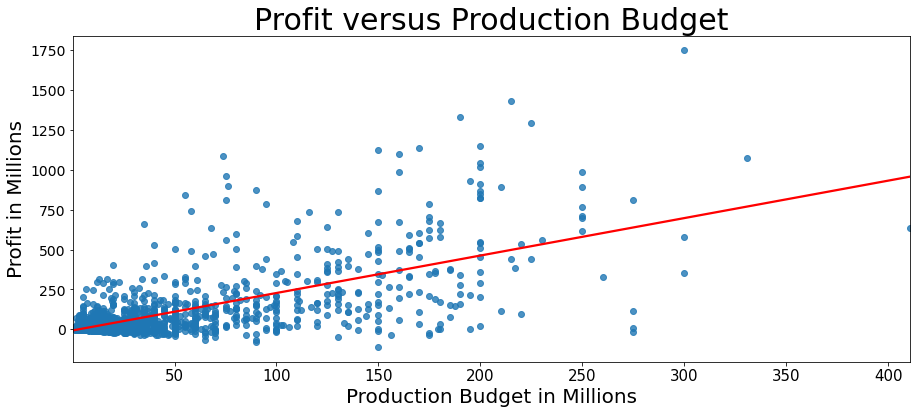

In [8]:
x_b = [number/1000000 for number in final_table['production_budget']]
y_p = [number/1000000 for number in final_table['profit']]



fig, ax = plt.subplots(figsize = (15,6))
sns.regplot(data=final_table, x = x_b, y = y_p ,line_kws={"color": "red"},ci=None)
plt.title('Profit versus Production Budget', fontsize = 30)
plt.xlabel('Production Budget in Millions', fontsize = 20)
plt.ylabel('Profit in Millions', fontsize = 20)
ax.ticklabel_format(useOffset=False, style = 'plain')
plt.xticks(size = 15)
plt.yticks(size = 14)
plt.savefig('images/Profit vs Budget');

#### As seen above, the relationship between the production budget and profit is of moderate positive relationship. As the production budget increase there is going to be an increase in proft. Which won't always be the case for a couple of outliers. Regardless, this proves our point that if you have a greater production budget, then you'll have a greater chance at profit.

## Looking at Popularity versus Budget

In [9]:
final_table['popularity'].describe()

count    1266.000000
mean       13.838359
std         7.963574
min         0.600000
25%         8.881000
50%        12.080500
75%        16.479000
max        80.773000
Name: popularity, dtype: float64

##### Looks like there is some top end data points that are a lot higher than the rest. Lets just look at those

In [10]:
final_table.loc[final_table['popularity'] > 50]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count,profit
150,182,7,2018-04-27,avengers:infinitywar,300000000,"$678,815,482",2048134200,682.711400,2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",80.773,8.3,13948,1748134200
156,188,27,2012-05-04,theavengers,225000000,"$623,279,547",1517935897,674.638176,2012,tt0848228,143.0,"Action,Adventure,Sci-Fi",50.289,7.6,19673,1292935897
382,452,22,2014-12-17,thehobbit:thebattleofthefivearmies,250000000,"$255,119,788",945577621,378.231048,2014,tt2310332,144.0,"Adventure,Fantasy",53.783,7.3,8392,695577621
600,698,6,2014-10-24,johnwick,30000000,"$43,037,835",76235001,254.116670,2014,tt2911666,101.0,"Action,Crime,Thriller",78.123,7.2,10081,46235001


In [11]:
final_table['production_budget'].describe()

count    1.266000e+03
mean     5.030392e+07
std      5.723965e+07
min      5.000000e+04
25%      1.200000e+07
50%      3.000000e+07
75%      6.500000e+07
max      4.106000e+08
Name: production_budget, dtype: float64

In [12]:
final_table.loc[final_table['production_budget'] > 400000000]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count,profit
598,696,2,2011-05-20,piratesofthecaribbean:onstrangertides,410600000,"$241,063,875",1045663875,254.667286,2011,tt1298650,136.0,"Action,Adventure,Fantasy",30.579,6.4,8571,635063875


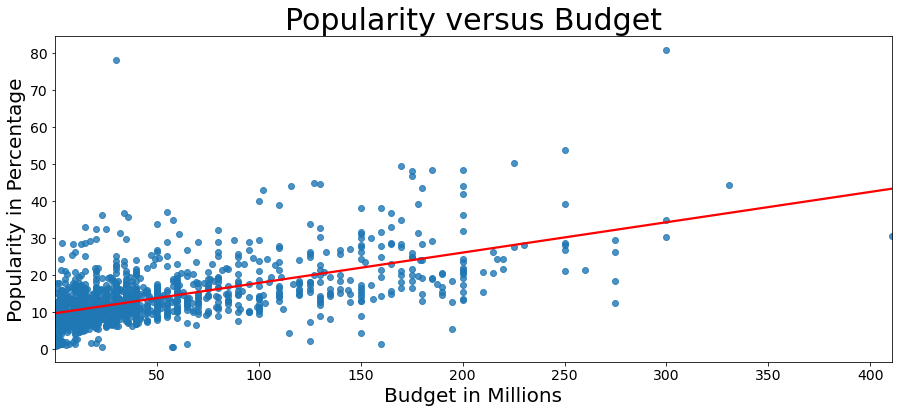

In [63]:
fig, ax = plt.subplots(figsize = (15,6))
sns.regplot(data=final_table,x=[number/1000000 for number in final_table['production_budget']],
            y=final_table['popularity'],line_kws={"color": "red"},ci=None)
plt.title('Popularity versus Budget', fontsize = 30)
plt.xlabel('Budget in Millions', fontsize = 20)
plt.ylabel('Popularity in Percentage', fontsize = 20)
ax.ticklabel_format(useOffset=False, style = 'plain')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.savefig('images/Popularity vs Budget');

#### As seen above, the relationship between the production budget and popularity is of moderate positive relationship. This shows that on average as your production cost goes up the popularity of the movie goes up. This obviously isn't gaurenteed, but defiently gives a higher chance. If I had more time I would look into how much those few movies in this list skews the data. Also would look into adding more movies to the data to get a greater sammple size

# Genre Data

### We need a table that focuses on genres. Going to split the genre collumn in final_table on the comma, to make them a list. Then exploding the table to get each genre for each movie on its own row.

In [14]:
final_table_genres = final_table.copy()
final_table_genres['genres'] = final_table_genres['genres'].str.split(",")
final_table_genres = final_table_genres.explode('genres')
final_table_genres

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count,profit
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Horror,9.669,5.9,1197,202039844
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Mystery,9.669,5.9,1197,202039844
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,Thriller,9.669,5.9,1197,202039844
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,Horror,13.989,5.6,3357,250362920
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,Mystery,13.989,5.6,3357,250362920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,Comedy,6.487,4.0,172,-25864564
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,Romance,6.487,4.0,172,-25864564
1265,1477,83,2015-10-30,freaksofnature,33000000,"$70,958",70958,0.215024,2015,tt1817771,92.0,Comedy,9.310,5.8,231,-32929042
1265,1477,83,2015-10-30,freaksofnature,33000000,"$70,958",70958,0.215024,2015,tt1817771,92.0,Horror,9.310,5.8,231,-32929042


In [15]:
final_table_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 0 to 1265
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3315 non-null   int64  
 1   id                 3315 non-null   int64  
 2   release_date       3315 non-null   object 
 3   movie              3315 non-null   object 
 4   production_budget  3315 non-null   int64  
 5   domestic_gross     3315 non-null   object 
 6   worldwide_gross    3315 non-null   int64  
 7   ROI                3315 non-null   float64
 8   start_year         3315 non-null   int64  
 9   movie_id           3315 non-null   object 
 10  runtime_minutes    3315 non-null   float64
 11  genres             3315 non-null   object 
 12  popularity         3315 non-null   float64
 13  vote_average       3315 non-null   float64
 14  vote_count         3315 non-null   int64  
 15  profit             3315 non-null   int64  
dtypes: float64(4), int64(7),

In [16]:
final_table_genres.describe()

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count,profit
count,3315.000000,3315.000000,3.315000e+03,3.315000e+03,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3.315000e+03
mean,729.087481,50.748416,5.401966e+07,1.741834e+08,358.378421,2013.814480,109.488989,14.300364,6.359578,2507.392459,1.201637e+08
std,413.824794,28.447127,5.921720e+07,2.551378e+08,436.968874,2.562373,16.591659,8.168129,0.781385,3056.385936,2.121581e+08
min,7.000000,1.000000,5.000000e+04,5.969600e+04,0.215024,2010.000000,79.000000,0.600000,2.600000,2.000000,-1.104502e+08
25%,369.000000,26.000000,1.300000e+07,2.219740e+07,119.499087,2012.000000,97.000000,9.064000,5.900000,528.500000,3.026060e+06
50%,736.000000,51.000000,3.100000e+07,7.589810e+07,241.125083,2014.000000,107.000000,12.389000,6.300000,1337.000000,4.083107e+07
75%,1080.000000,75.000000,7.000000e+07,2.094614e+08,422.261705,2016.000000,119.000000,16.982000,6.900000,3330.000000,1.333934e+08
max,1477.000000,100.000000,4.106000e+08,2.048134e+09,4140.796880,2018.000000,180.000000,80.773000,8.400000,22186.000000,1.748134e+09


### Need to get a table that counts up total movies per genre.

In [17]:
f_t_count = final_table_genres.groupby('genres').count().sort_values(by='id',ascending=False)
f_t_count

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count,profit
genres,,,,,,,,,,,,,,,
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457
Action,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Thriller,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Romance,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
Horror,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120


## We are only going to look at the genres that have at least 50 movies in the genre to make sure we have enough data points to not easily skew the data with a few outliers.

In [18]:
f_t_count = f_t_count.loc[f_t_count['id'] > 50]
f_t_count

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count,profit
genres,,,,,,,,,,,,,,,
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457
Action,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Thriller,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Romance,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
Horror,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120


In [19]:
f_t_genres = list(f_t_count.index)
f_t_num = list(f_t_count['id'].values)

### The above code is to get lists of the genres, and the number of movies.

In [20]:
f_t_genres

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Romance',
 'Horror',
 'Biography',
 'Sci-Fi',
 'Fantasy',
 'Mystery',
 'Animation',
 'Family']

In [21]:
f_t_num

[620, 457, 395, 326, 212, 212, 174, 135, 120, 118, 113, 104, 94, 84]

In [22]:
f_t_genres

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Romance',
 'Horror',
 'Biography',
 'Sci-Fi',
 'Fantasy',
 'Mystery',
 'Animation',
 'Family']

In [23]:
f_t_num

[620, 457, 395, 326, 212, 212, 174, 135, 120, 118, 113, 104, 94, 84]

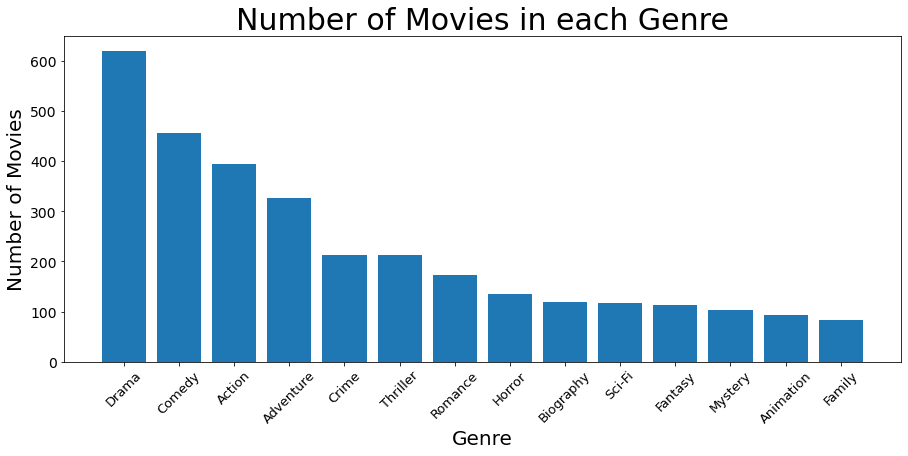

In [24]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=f_t_genres,height=f_t_num)
plt.xticks(rotation=45,size = 13)
plt.title('Number of Movies in each Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20)
plt.yticks(size = 14);

## We want to find the Average ROI per genre, so we are going to find the total ROI for each genre and then divide by the total number of movies in each genre.

In [25]:
f_t_count_in_order = final_table_genres.groupby('genres').count()
f_t_count_in_order = f_t_count_in_order.loc[f_t_count_in_order['id'] > 50]
f_t_count_in_order

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,popularity,vote_average,vote_count,profit
genres,,,,,,,,,,,,,,,
Action,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
Adventure,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326
Animation,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
Biography,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
Comedy,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457
Crime,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
Drama,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620
Family,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
Fantasy,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113


In [26]:
num_of_movies_per_genre = list(f_t_count_in_order['id'].values)
num_of_movies_per_genre

[395, 326, 94, 120, 457, 212, 620, 84, 113, 135, 104, 174, 118, 212]

In [27]:
roi_genre_order_table = final_table_genres.groupby('genres').sum()
roi_genre_order_table = roi_genre_order_table.loc[(roi_genre_order_table.index == 'Drama') | 
                          (roi_genre_order_table.index == 'Comedy') |
                         (roi_genre_order_table.index == 'Action') |
                         (roi_genre_order_table.index == 'Adventure') |
                         (roi_genre_order_table.index == 'Thriller') |
                         (roi_genre_order_table.index == 'Crime') |
                         (roi_genre_order_table.index == 'Romance') |
                         (roi_genre_order_table.index == 'Horror') |
                         (roi_genre_order_table.index == 'Biography') |
                         (roi_genre_order_table.index == 'Sci-Fi') |
                         (roi_genre_order_table.index == 'Fantasy') |
                         (roi_genre_order_table.index == 'Mystery') |
                         (roi_genre_order_table.index == 'Animation') |
                         (roi_genre_order_table.index == 'Family')]

In [28]:
roi_genre_order_table

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count,profit
genres,,,,,,,,,,,
Action,301384,20035,33970900000,104384601134,109729.039619,795490,44675.0,7043.824,2473.1,1443653,70413701134
Adventure,220670,15586,35693000000,119656362813,104978.987177,656577,36414.0,6072.932,2075.4,1375930,83963362813
Animation,53612,4210,9560000000,37789331264,36983.840251,189329,8977.0,1553.274,614.3,291399,28229331264
Biography,92671,6134,3273270000,10204442637,41311.307667,241762,14294.0,1482.667,829.4,215118,6931172637
Comedy,320417,22750,20243150000,68215823682,154607.680162,920214,46990.0,5775.470,2851.5,856361,47972673682
Crime,182304,10479,7339820000,18952840831,49357.982989,426949,23308.0,2888.528,1338.2,399559,11613020831
Drama,484459,31730,18416642650,51346040737,211365.665877,1248556,69834.0,7478.838,4065.2,1096946,32929398087
Family,65788,4434,5877900000,17290057931,23867.482186,169106,8881.0,1117.280,520.8,172765,11412157931
Fantasy,85667,5787,10107650000,28665014243,37331.751939,227547,12597.0,1929.996,691.7,379539,18557364243


In [29]:
list_of_total_roi_per_genre = list(roi_genre_order_table['ROI'].values)
list_of_total_roi_per_genre

[109729.03961852108,
 104978.98717698823,
 36983.84025090016,
 41311.307666989844,
 154607.6801616492,
 49357.982988940006,
 211365.66587697229,
 23867.48218634462,
 37331.75193867503,
 88749.57523165588,
 66284.54094313303,
 66430.0634841919,
 46290.001876005874,
 105331.86481982713]

In [30]:
avg_roi_per_genre = [i / j for i, j in zip(list_of_total_roi_per_genre, num_of_movies_per_genre)]
avg_roi_per_genre

[277.79503700891416,
 322.0214330582461,
 393.4451090521294,
 344.26089722491537,
 338.31002223555623,
 232.8206744761321,
 340.9123643176972,
 284.1366926945788,
 330.36948618296486,
 657.4042609752287,
 637.351355222433,
 381.78197404707987,
 392.2881514915752,
 496.8484189614487]

In [31]:
genres_Alpha_order = list(roi_genre_order_table.index)
genres_Alpha_order

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller']

### The code below is just to get the order of genres with the highest ROI to the least ROI.

In [32]:
x = list(dict(sorted(dict(zip(genres_Alpha_order, avg_roi_per_genre)).items()
                     , key=lambda x: x[1], reverse=True)).keys())
y = list(dict(sorted(dict(zip(genres_Alpha_order, avg_roi_per_genre)).items()
                     , key=lambda x: x[1], reverse=True)).values())

In [33]:
x

['Horror',
 'Mystery',
 'Thriller',
 'Animation',
 'Sci-Fi',
 'Romance',
 'Biography',
 'Drama',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Family',
 'Action',
 'Crime']

In [34]:
y

[657.4042609752287,
 637.351355222433,
 496.8484189614487,
 393.4451090521294,
 392.2881514915752,
 381.78197404707987,
 344.26089722491537,
 340.9123643176972,
 338.31002223555623,
 330.36948618296486,
 322.0214330582461,
 284.1366926945788,
 277.79503700891416,
 232.8206744761321]

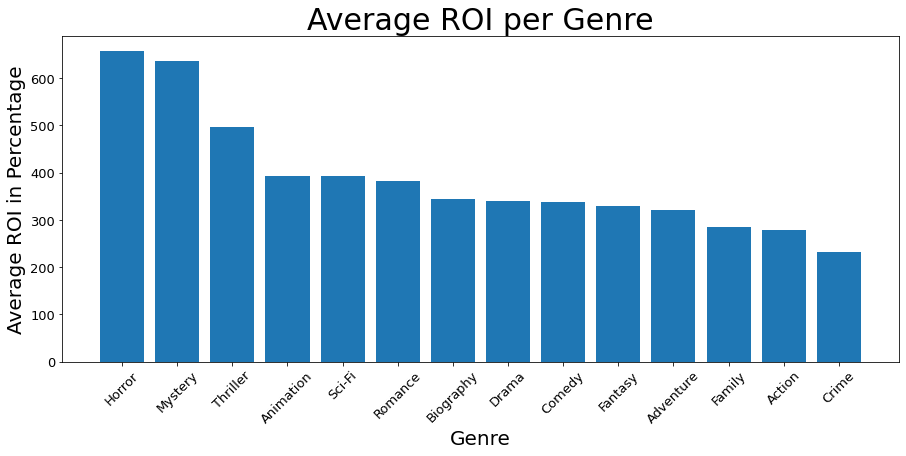

In [35]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=x,height=y)
plt.title('Average ROI per Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Average ROI in Percentage', fontsize = 20)
plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13);

In [36]:
final_table_genres.loc[final_table_genres['genres'] == 'Horror'].describe()

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count,profit
count,135.000000,135.000000,1.350000e+02,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,1.350000e+02
mean,639.474074,51.333333,2.254407e+07,8.149852e+07,657.404261,2014.133333,99.081481,12.419156,5.799259,1619.622222,5.895445e+07
std,494.752642,27.627317,3.144536e+07,1.063753e+08,884.366697,2.605391,12.302197,5.395764,0.717219,1658.756101,9.311212e+07
min,7.000000,1.000000,6.500000e+05,7.095800e+04,0.215024,2010.000000,80.000000,0.667000,3.600000,23.000000,-7.944858e+07
25%,155.500000,28.000000,5.000000e+06,1.472403e+07,104.186527,2012.000000,91.000000,8.971500,5.300000,560.000000,1.869515e+05
50%,579.000000,54.000000,1.060000e+07,5.172364e+07,297.489166,2014.000000,96.000000,11.302000,5.900000,1061.000000,2.914609e+07
75%,1125.500000,74.500000,2.700000e+07,9.980374e+07,773.389970,2016.000000,106.000000,14.468000,6.200000,2120.500000,8.492471e+07
max,1477.000000,100.000000,1.900000e+08,6.974580e+08,4140.796880,2018.000000,152.000000,31.397000,7.500000,10931.000000,6.624580e+08


In [37]:
final_table_genres.describe()

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count,profit
count,3315.000000,3315.000000,3.315000e+03,3.315000e+03,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3.315000e+03
mean,729.087481,50.748416,5.401966e+07,1.741834e+08,358.378421,2013.814480,109.488989,14.300364,6.359578,2507.392459,1.201637e+08
std,413.824794,28.447127,5.921720e+07,2.551378e+08,436.968874,2.562373,16.591659,8.168129,0.781385,3056.385936,2.121581e+08
min,7.000000,1.000000,5.000000e+04,5.969600e+04,0.215024,2010.000000,79.000000,0.600000,2.600000,2.000000,-1.104502e+08
25%,369.000000,26.000000,1.300000e+07,2.219740e+07,119.499087,2012.000000,97.000000,9.064000,5.900000,528.500000,3.026060e+06
50%,736.000000,51.000000,3.100000e+07,7.589810e+07,241.125083,2014.000000,107.000000,12.389000,6.300000,1337.000000,4.083107e+07
75%,1080.000000,75.000000,7.000000e+07,2.094614e+08,422.261705,2016.000000,119.000000,16.982000,6.900000,3330.000000,1.333934e+08
max,1477.000000,100.000000,4.106000e+08,2.048134e+09,4140.796880,2018.000000,180.000000,80.773000,8.400000,22186.000000,1.748134e+09


## Going to graph average profit per genre. To do that, got to get the total worldwide gross per genre and the total production budget per genre. Then subtract the production cost from the total worldwide gross. Then divide by the total number of movies per genre.

In [38]:
list_of_total_worldwide_gross_per_genre = list(roi_genre_order_table['worldwide_gross'].values)
list_of_total_worldwide_gross_per_genre

[104384601134,
 119656362813,
 37789331264,
 10204442637,
 68215823682,
 18952840831,
 51346040737,
 17290057931,
 28665014243,
 11002300843,
 10548382224,
 13277093850,
 44150543604,
 28573182034]

In [39]:
list_of_total_production_budget_per_genre = list(roi_genre_order_table['production_budget'].values)
list_of_total_production_budget_per_genre

[33970900000,
 35693000000,
 9560000000,
 3273270000,
 20243150000,
 7339820000,
 18416642650,
 5877900000,
 10107650000,
 3043450000,
 2940187650,
 4220365000,
 11828075000,
 8137937650]

In [40]:
total_profit_per_genre = [i - j for i, j 
                    in zip(list_of_total_worldwide_gross_per_genre,list_of_total_production_budget_per_genre )]
avg_profit_per_genre = [i / j for i, j 
                    in zip(total_profit_per_genre,num_of_movies_per_genre )]

### The code below is just to get the order of genres with the highest profit to the least profit.

In [41]:
x_2 = list(dict(sorted(dict(zip(genres_Alpha_order,avg_profit_per_genre )).items()
                     , key=lambda x: x[1], reverse=True)).keys())
y_2 = list(dict(sorted(dict(zip(genres_Alpha_order,avg_profit_per_genre )).items()
                     , key=lambda x: x[1], reverse=True)).values())

In [42]:
x_2

['Animation',
 'Sci-Fi',
 'Adventure',
 'Action',
 'Fantasy',
 'Family',
 'Comedy',
 'Thriller',
 'Mystery',
 'Horror',
 'Biography',
 'Crime',
 'Drama',
 'Romance']

In [43]:
y_2

[300312034.7234042,
 273919225.4576271,
 257556327.64723927,
 178262534.5164557,
 164224462.32743362,
 135859022.98809522,
 104973027.75054705,
 96392662.18867925,
 73155717.0576923,
 58954450.68888889,
 57759771.975,
 54778400.14622641,
 53111932.3983871,
 52050165.8045977]

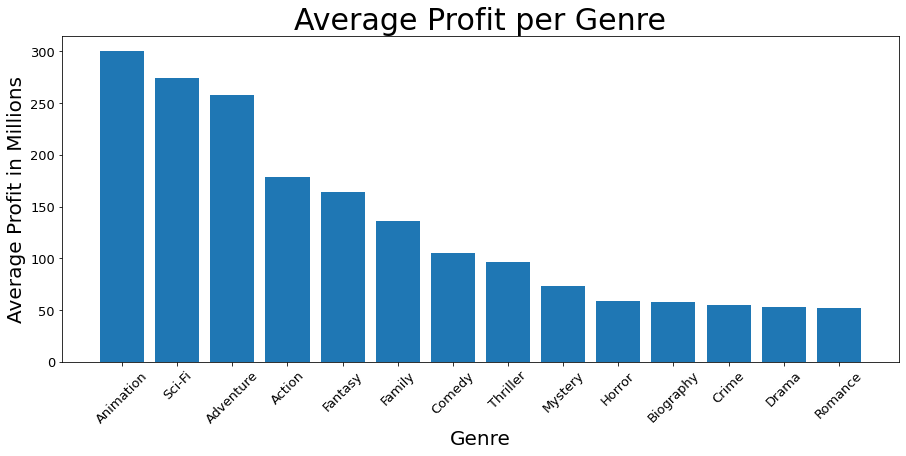

In [44]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=x_2,height=[number/1000000 for number in y_2])
plt.title('Average Profit per Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Average Profit in Millions', fontsize = 20)
plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13)
plt.savefig('images/Average Profit per Genre',bbox_inches='tight');

## Going to graph average popularity per genre. To do that, got to get the total popularity per genre. Then divide the total popularity by the total number of movies per genre.

In [45]:
list_of_total_popularity_per_genre = list(roi_genre_order_table['popularity'].values)
list_of_total_popularity_per_genre

[7043.823999999995,
 6072.931999999997,
 1553.2740000000006,
 1482.667000000001,
 5775.4699999999975,
 2888.5280000000007,
 7478.837999999998,
 1117.2800000000002,
 1929.9959999999987,
 1676.586,
 1452.3689999999997,
 1860.4509999999998,
 2436.5079999999994,
 2989.944]

In [46]:
avg_popularity_per_genre = [i / j for i, j in zip(list_of_total_popularity_per_genre, num_of_movies_per_genre)]
avg_popularity_per_genre

[17.832465822784798,
 18.628625766871156,
 16.52419148936171,
 12.355558333333342,
 12.63778993435448,
 13.6251320754717,
 12.062641935483867,
 13.300952380952383,
 17.079610619469015,
 12.419155555555555,
 13.965086538461536,
 10.692247126436781,
 20.648372881355925,
 14.103509433962264]

### The code below is just to get the order of genres with the highest average popularity to the lowest average popularity.

In [47]:
x_3 = list(dict(sorted(dict(zip(genres_Alpha_order,avg_popularity_per_genre )).items()
                     , key=lambda x: x[1], reverse=True)).keys())
y_3 = list(dict(sorted(dict(zip(genres_Alpha_order,avg_popularity_per_genre )).items()
                     , key=lambda x: x[1], reverse=True)).values())

In [48]:
x_3

['Sci-Fi',
 'Adventure',
 'Action',
 'Fantasy',
 'Animation',
 'Thriller',
 'Mystery',
 'Crime',
 'Family',
 'Comedy',
 'Horror',
 'Biography',
 'Drama',
 'Romance']

In [49]:
y_3

[20.648372881355925,
 18.628625766871156,
 17.832465822784798,
 17.079610619469015,
 16.52419148936171,
 14.103509433962264,
 13.965086538461536,
 13.6251320754717,
 13.300952380952383,
 12.63778993435448,
 12.419155555555555,
 12.355558333333342,
 12.062641935483867,
 10.692247126436781]

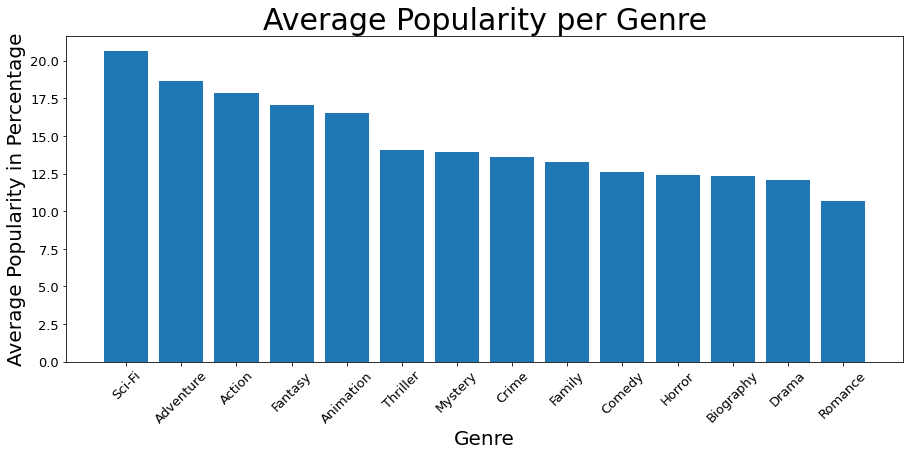

In [50]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=x_3,height= y_3)
plt.title('Average Popularity per Genre', fontsize = 30)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Average Popularity in Percentage', fontsize = 20)
plt.xticks(rotation=45, size = 13)
plt.yticks(size = 13)
plt.savefig('images/Average Popularity per Genre',bbox_inches='tight');

# Months Data

In [51]:
final_table

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count,profit
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197,202039844
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357,250362920
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519,68365900
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797,88266581
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220,143806510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145,-15905188
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28,-24853851
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151,-17905047
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172,-25864564


#### Need to make a new collumn with the release month.

In [52]:
final_table['release_month'] = pd.DatetimeIndex(final_table['release_date']).month

In [53]:
final_table

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,start_year,movie_id,runtime_minutes,genres,popularity,vote_average,vote_count,profit,release_month
0,7,51,2011-10-21,paranormalactivity3,5000000,"$104,028,807",207039844,4140.796880,2011,tt1778304,83.0,"Horror,Mystery,Thriller",9.669,5.9,1197,202039844,10
1,8,84,2014-10-03,annabelle,6500000,"$84,273,813",256862920,3951.737231,2014,tt3322940,99.0,"Horror,Mystery,Thriller",13.989,5.6,3357,250362920,10
2,9,15,2010-08-27,thelastexorcism,1800000,"$41,034,350",70165900,3898.105556,2010,tt1320244,87.0,"Drama,Horror,Thriller",9.350,5.6,519,68365900,8
3,10,67,2013-06-07,thepurge,3000000,"$64,473,115",91266581,3042.219367,2013,tt2184339,85.0,"Horror,Thriller",24.364,6.2,4797,88266581,6
4,11,55,2016-07-22,lightsout,5000000,"$67,268,835",148806510,2976.130200,2016,tt4786282,81.0,"Drama,Horror,Mystery",12.408,6.3,2220,143806510,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1462,79,2012-11-02,vamps,16000000,"$3,361",94812,0.592575,2012,tt1545106,92.0,"Comedy,Horror,Romance",6.650,5.0,145,-15905188,11
1262,1463,19,2010-06-30,loveranch,25000000,"$137,885",146149,0.584596,2010,tt1125929,117.0,"Biography,Comedy,Drama",6.185,6.1,28,-24853851,6
1263,1467,51,2014-11-14,wolves,18000000,$0,94953,0.527517,2014,tt1403241,91.0,"Action,Fantasy,Horror",8.627,5.8,151,-17905047,11
1264,1468,55,2015-03-17,accidentallove,26000000,$0,135436,0.520908,2015,tt1137470,100.0,"Comedy,Romance",6.487,4.0,172,-25864564,3


## To be able to graph the average profit per month, first must get the number of movies per month. Then the total gross and total budget in each month. Next subtract the budget from the gross, and then finally divide by the number of movies in that month.

In [54]:
final_table.groupby('release_month').count().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='release_month')

In [55]:
num_of_movies_per_month = list(final_table.groupby('release_month').count()['id'].values)
num_of_movies_per_month

[60, 82, 105, 82, 80, 108, 108, 112, 126, 145, 129, 129]

In [56]:
month_table = final_table.groupby('release_month').sum()
month_table

,Unnamed: 0,id,production_budget,worldwide_gross,ROI,start_year,runtime_minutes,popularity,vote_average,vote_count,profit
release_month,,,,,,,,,,,
1,42453,2974,2152400000,5193957947,22861.790599,120830,6193.0,742.308,343.7,79873,3041557947
2,55927,4593,3698470000,11804677616,28824.153487,165122,8898.0,1099.588,503.2,186153,8106207616
3,81697,5126,6357100000,17763782456,31072.210383,211473,11285.0,1427.901,657.9,269195,11406682456
4,57979,4007,3665700000,14138222363,28557.244855,165126,8769.0,1034.147,515.6,147967,10472522363
5,56108,4096,7259850000,23303355909,25885.803424,161096,8921.0,1398.654,503.9,312255,16043505909
6,74931,5605,7276250000,27316944624,44406.529113,217513,11754.0,1537.587,692.9,314854,20040694624
7,67023,5419,6679700000,23388135380,51040.543360,217488,11620.0,1598.728,681.4,321844,16708435380
8,86314,6020,4290120000,11350935266,37820.141189,225517,11779.0,1438.080,701.1,200931,7060815266
9,100147,6116,3668577650,9784841730,37592.220276,253710,13509.0,1550.282,802.5,205138,6116264080


In [57]:
total_gross_per_month = list(month_table['worldwide_gross'].values)
total_gross_per_month

[5193957947,
 11804677616,
 17763782456,
 14138222363,
 23303355909,
 27316944624,
 23388135380,
 11350935266,
 9784841730,
 12435610112,
 26172141330,
 21955393129]

In [58]:
total_budget_per_month = list(month_table['production_budget'].values)
total_budget_per_month

[2152400000,
 3698470000,
 6357100000,
 3665700000,
 7259850000,
 7276250000,
 6679700000,
 4290120000,
 3668577650,
 4176300000,
 7672200000,
 6788100000]

In [59]:
total_profit_per_month = [i - j for i, j 
                    in zip(total_gross_per_month,total_budget_per_month )]
avg_profit_per_month = [i / j for i, j 
                    in zip(total_profit_per_month,num_of_movies_per_month )]

In [60]:
avg_profit_per_month

[50692632.45,
 98856190.43902439,
 108635071.00952381,
 127713687.35365854,
 200543823.8625,
 185561987.25925925,
 154707735.0,
 63042993.446428575,
 48541778.41269841,
 56960759.39310345,
 143410397.90697673,
 117575915.72868218]

In [61]:
months_name_list = ['January','Feburary','March','April','May','June','July','August',
                    'September','October','November','December']

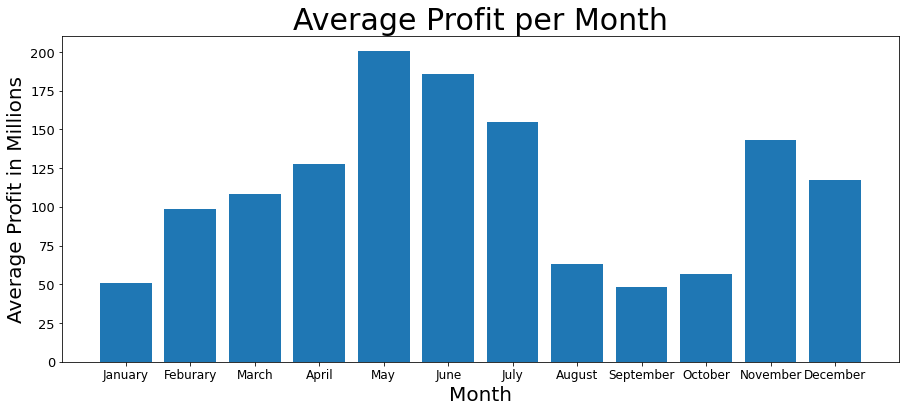

In [62]:
fig, ax = plt.subplots(figsize = (15,6))
ax.bar(x=list(final_table.groupby('release_month').count().index),
       height=[number/1000000 for number in avg_profit_per_month])
plt.title('Average Profit per Month', fontsize = 30)
plt.xticks(list(final_table.groupby('release_month').count().index),months_name_list, size = 12)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Average Profit in Millions', fontsize = 20)
plt.yticks(size = 13)
plt.savefig('images/Average Profit per Month');